Importing necessary libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency,chisquare
from scipy.stats import f_oneway,kruskal
from scipy.stats import shapiro
from scipy.stats import levene

import warnings as w
w.filterwarnings("ignore")

In [2]:
# loading the dataset for analysis.
df = pd.read_csv("yulu.csv")

In [3]:
# sampling of dataset.
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# Checking the shape of the dataset -

print("Number of rows:",df.shape[0])
print("Number of columns:",df.shape[1])

Number of rows: 10886
Number of columns: 12


In [5]:
# information about the dataset. finding what kind of date is present in each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
# Statistical description of the data set .
df.describe(include = "all")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [7]:
# Checking is there any any null values present in the dataset or not.
df.isna().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [8]:
#names of the columns present in the dataset.
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [9]:
# checking for dulpicates in any
df.duplicated().sum()

np.int64(0)

In [10]:
# determining different types of dataset in each columns.
df.dtypes

,0
datetime,object
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


In [11]:
# Try establishing a relation between the dependent and independent variable (Dependent “Count” & Independent: Workingday, Weather, Season etc)

In [12]:
def count_val(df,col_name):
  print("unique values:",df[col_name].unique())
  print("value counts:")
  print(df[col_name].value_counts())

In [13]:
col_name = ["workingday","holiday","weather","season"]
for col in col_name:
  print(col," :")
  count_val(df,col)
  print("\n")

workingday  :
unique values: [0 1]
value counts:
workingday
1    7412
0    3474
Name: count, dtype: int64


holiday  :
unique values: [0 1]
value counts:
holiday
0    10575
1      311
Name: count, dtype: int64


weather  :
unique values: [1 2 3 4]
value counts:
weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64


season  :
unique values: [1 2 3 4]
value counts:
season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64




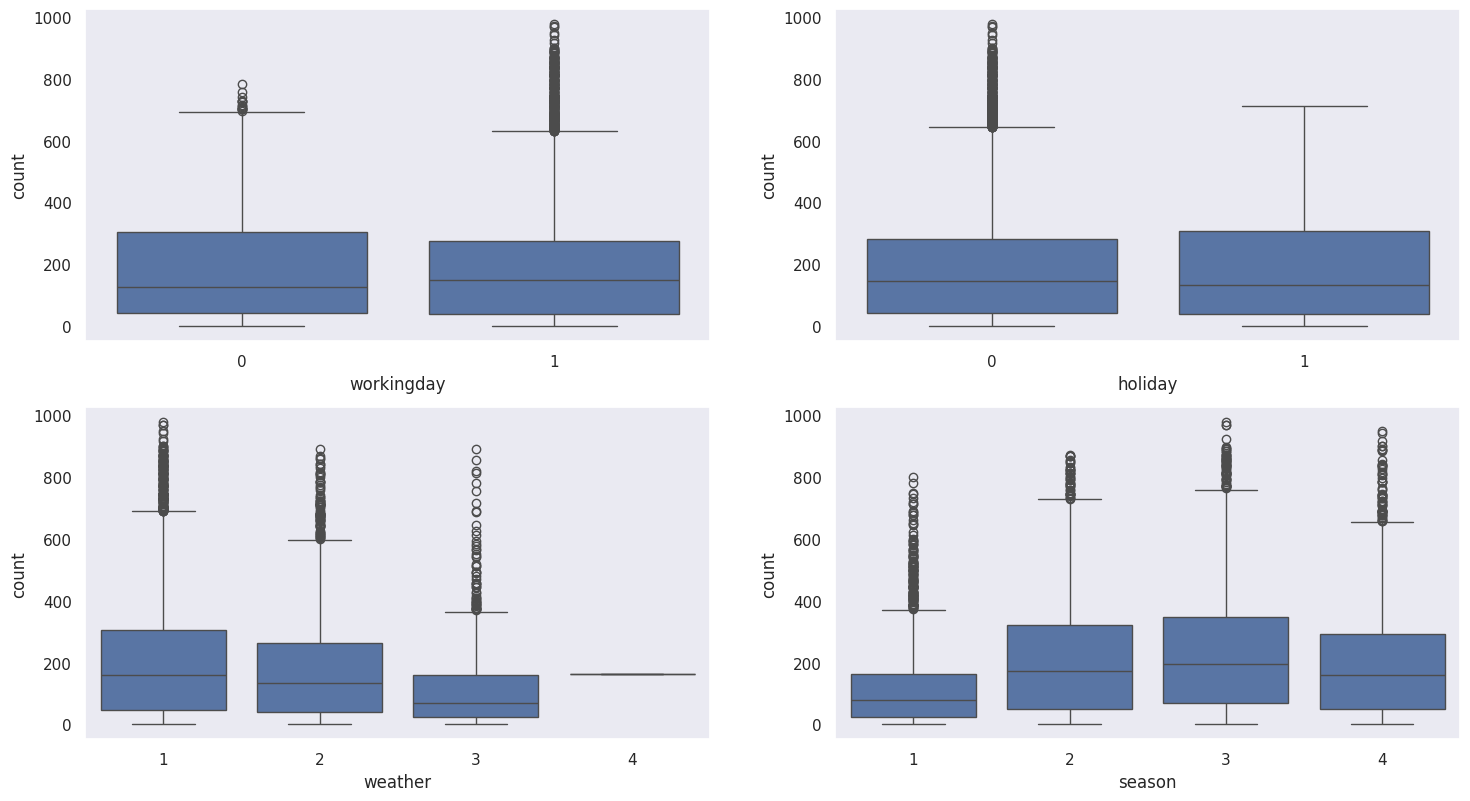

In [14]:
sns.set(style="dark")
fig = plt.figure(figsize=(10, 25))
fig.subplots_adjust(right=1.5)

for plot in range(1, len(col_name)+1):
    plt.subplot(5, 2, plot)
    sns.boxplot(x=df[col_name[plot-1]], y=df['count'])

plt.show()

In [15]:
# lets Drop the columns which are help us understand  factors affecting the demand for these shared electric cycles in the Indian market
data = df.drop(columns = ["casual","registered","atemp"])

In [16]:
data.tail()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,50,26.0027,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,57,15.0013,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,61,15.0013,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,61,6.0032,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,66,8.9981,88


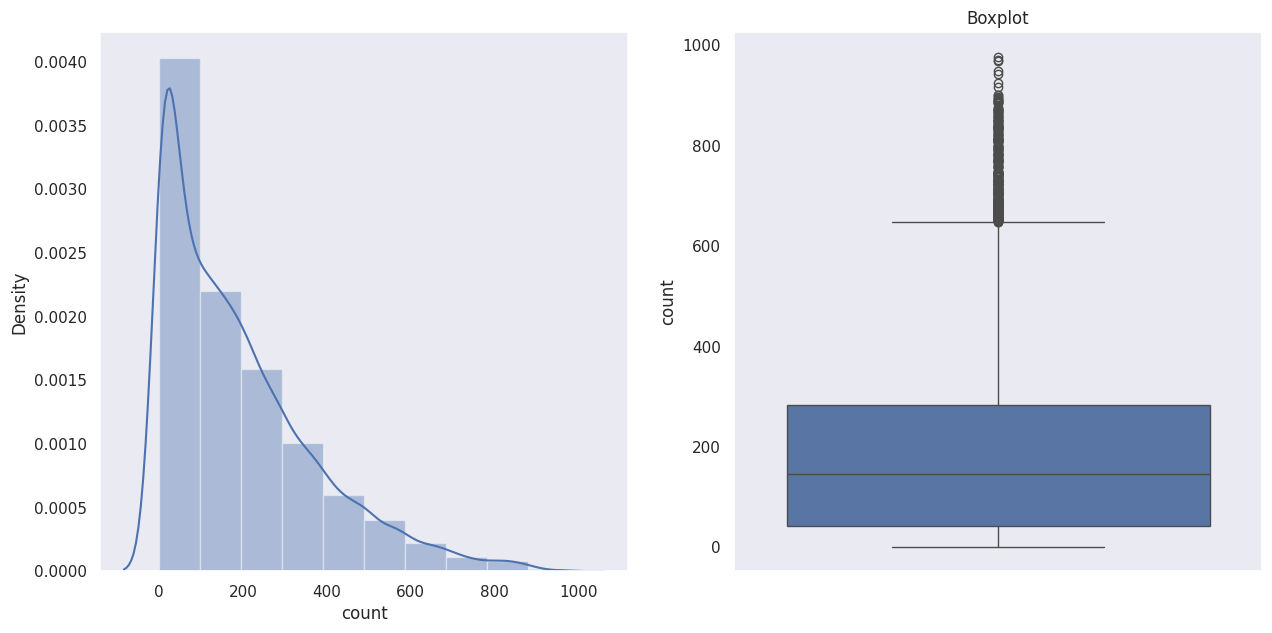

In [17]:
# lets check the distribution using histogram and boxplot.
plt.figure(figsize= (15,7))
plt.subplot(1,2,1)
sns.distplot(data["count"],bins = 10)

# boxplot
plt.subplot(1,2,2)
sns.boxplot(y=data["count"])
plt.title("Boxplot")
plt.show()

We can see that outliers are present in the given columns. We need to figure out a way to deal with them before starting with the tests


1. Try to understand if these values make any sense according to the business
problem. If yes, then we can keep them as it is.
2. In case these outliers are some invalid values which do not make much sense, we can remove them using the IQR.
3. We can apply a log transformation on the data to reduce the effect of these outliers.




In [18]:
# The outliers in the given data set are the no. of bike rides per session/day. These values could sometimes be higher than expected due to increase in the crowd on certain days/occasions.
# These data values are important for capturing variations in the data. Hence, in this case, the ideal approach of dealing with outliers would be to leave them as it is.
# But since the tests that we are going to apply are based on the assumption that the dataset is normal or near normal, we will drop those outlier values using the IQR method.

Lets transform the values to log normal and see whose change in distribution is not effecting the analysis.

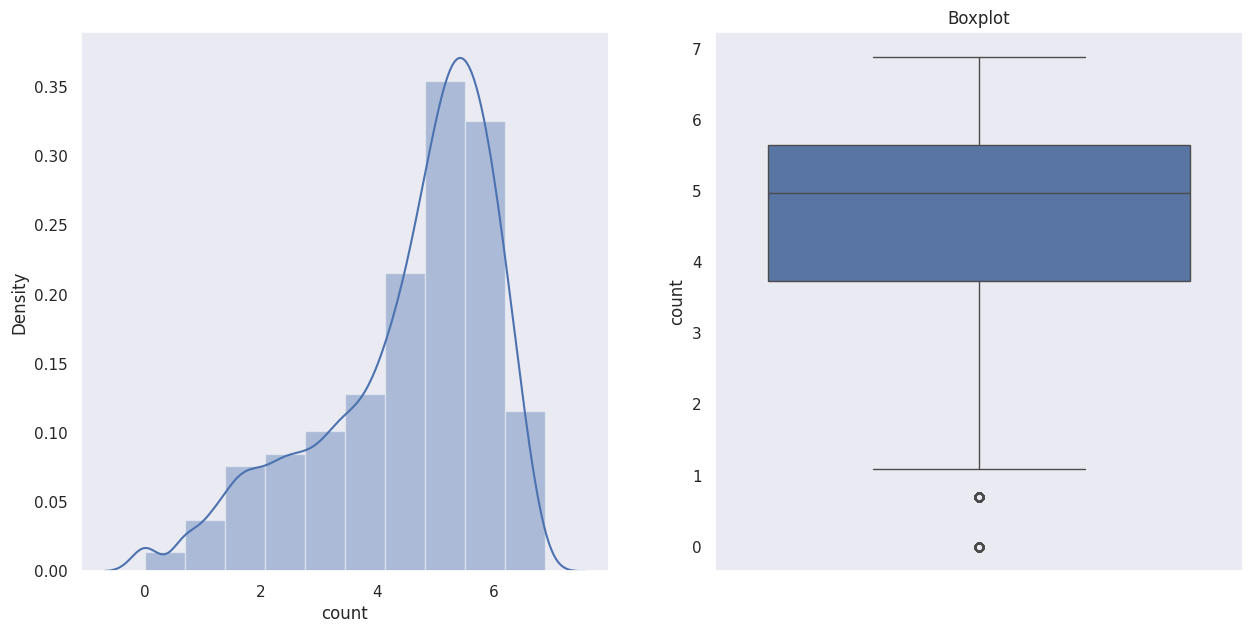

In [19]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.distplot(np.log(data["count"]),bins = 10)

# boxplot
plt.subplot(1,2,2)
sns.boxplot(y=np.log(data["count"]))
plt.title("Boxplot")
plt.show()

In [20]:
# outlier treatment using IQR just for reference.

In [21]:
# 1. workingday:
pd.DataFrame(data.groupby("workingday")["count"].describe())

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


In [22]:
# 2.Holiday:
pd.DataFrame(data.groupby("holiday")["count"].describe())

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,10575.0,191.741655,181.513131,1.0,43.0,145.0,283.0,977.0
1,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0


In [23]:
# 3.season :
pd.DataFrame(data.groupby("season")["count"].describe())

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [24]:
# 4. weather :
pd.DataFrame(data.groupby("weather")["count"].describe())

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


## Q1 : Is there any significant difference in number of bike rides between regular days holiday .

In [25]:
# Defining null and alternate hypothesis:

In [26]:
h0 = "There is a significant difference in number of bike rides between regular days and holiday."
h1 = "There is no significant difference in number of bike rides between regular days and holiday."

alpha = 0.05

holiday = data[data["holiday"] == 1]["count"]
regular = data[data["holiday"] == 0]["count"]

print("number of holiday:",len(holiday))
print("number of regular days:",len(regular))

number of holiday: 311
number of regular days: 10575


In [27]:
t_stats,p_val = ttest_ind(holiday,regular)
print("p_value :",p_val)
print("t_stats :",t_stats)

p_value : 0.5736923883271103
t_stats : -0.5626388963477119


In [28]:
if p_val < alpha :
  print("Null hypothesis is rejected :", h1)
else:
  print("fail to reject null hypothesis:",h0)

fail to reject null hypothesis: There is a significant difference in number of bike rides between regular days and holiday.


Observation: Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that the average no. of bike rides during regular days is different to those on holidays.

In [29]:
# lets check which days have higher bike rides

In [30]:
h0 = "The demand of bikes on regular days is greater than demand of bikes on holidays."
h1 = "The demand of bikes on regular days is less than the demand of bikes on holidays."

alpha = 0.05
t_stats,p_val = ttest_ind(holiday,regular,alternative ="less")
print("p_value :",p_val)
print("t_stats :",t_stats)

p_value : 0.28684619416355517
t_stats : -0.5626388963477119


In [31]:
if p_val < alpha :
  print("Null hypothesis is rejected :", h1)
else:
  print("fail to reject null hypothesis:",h0)

fail to reject null hypothesis: The demand of bikes on regular days is greater than demand of bikes on holidays.


Observation: Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that the average no. of bike rides during regular days is greater than or equal to those on holidays

# Q2 . Number of cycles rented similar or different in different seasons .

In [32]:
# Lets define null and alternative hypothesis.

In [33]:
h0 = "The average number of bike rides in different seasons are equal."
h1 = "The average number of bike rides in different seasons are not equal."

alpha = 0.05
data.groupby("season")["count"].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [34]:
season_1 = data[data["season"] == 1]["count"]
season_2 = data[data["season"] == 2]["count"]
season_3 = data[data["season"] == 3]["count"]
season_4 = data[data["season"] == 4]["count"]


In [35]:
f_stats,p_val = f_oneway(season_1,season_2,season_3,season_4)
print("p_value :",p_val)
print("f_stats :",f_stats)

p_value : 6.164843386499654e-149
f_stats : 236.94671081032098


In [36]:
if p_val < alpha :
  print("Null hypothesis is rejected :", h1)
else:
  print("fail to reject null hypothesis:",h0)

Null hypothesis is rejected : The average number of bike rides in different seasons are not equal.


***Observation***: Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the average no. of bike rides in different seasons are not equal

## **Q3. Number of cycles rented similar or different in different weather**

In [37]:
# lets define null and alternate hypothesis .

In [38]:
h0 = "The average number of bike rides in different weather conditions are equal."
h1 = "The average number of bike rides in different weather conditions are not equal."

alpha = 0.05
data.groupby("weather")["count"].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


In [39]:
# lets drop weather category "4" as we have only one data point.

In [40]:
weather_1 = data[data["weather"] == 1]["count"]
weather_2 = data[data["weather"] == 2]["count"]
weather_3 = data[data["weather"] == 3]["count"]

In [41]:
# As we are conducting the ANOVA lets do some test on assumption we have to make to conduct ANOVA

In [42]:
# Test for normality of the data : Shapiro test

ha = "Count follows normal distribution"
hb = "Count does not follow normal distribution"

alpha = 0.05

s_stats,p_val = shapiro(data["count"])
print("p_value :",p_val)
print("s_stats :",s_stats)

p_value : 5.369837893115507e-68
s_stats : 0.8783658962690556


In [43]:
if p_val < alpha :
  print("Null hypothesis is rejected :", hb)
else:
  print("fail to reject null hypothesis:",ha)

Null hypothesis is rejected : Count does not follow normal distribution


In [46]:
# Homogeneity of variance test : levene's test

ha1 = "The variances are equal"
hb1 = "The variances are not equal"

alpha = 0.05

stats,p_val = levene(weather_1,weather_2,weather_3)
print("p_value :",p_val)
print("stats :",stats)

p_value : 6.198278710731511e-36
stats : 81.67574924435011


In [47]:
if p_val < alpha :
  print("Null hypothesis is rejected :", hb1)
else:
  print("fail to reject null hypothesis:",ha1)

Null hypothesis is rejected : The variances are not equal


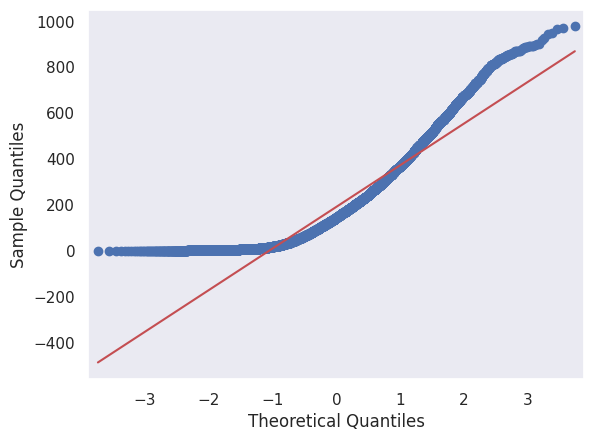

In [54]:
# lets also check using qq plot to see if the data is gaussian or not . (Even though its already proven from above its not normal)

from statsmodels.graphics.gofplots import qqplot
qqplot(data["count"],line = "s")
plt.show()

In [55]:
# As the line is not following around the line data is not Gaussian .

Note: As assumptions for ANOVA are not true for a given set of data (like in this case), we use the Kruskal-Wallis test even though its not as powerfull as ANOVA.

In [56]:
# KS - Test to check the sample median .

In [57]:
k_stats,p_val = kruskal(weather_1,weather_2,weather_3)
print("p_value :",p_val)
print("k_stats :",k_stats)

p_value : 3.122066178659941e-45
k_stats : 204.95566833068537


In [58]:
if p_val < alpha :
  print("Null hypothesis is rejected :", h1)
else:
  print("fail to reject null hypothesis:",h0)

Null hypothesis is rejected : The average number of bike rides in different weather conditions are not equal.


**Observation:** Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the average number of bike rides in different weather conditions are not equal

In [65]:
# Lets also check the difference between the number of bikes on weekdays and weekends:
h0 = "The demand of bikes on weekdays is greater or similar those on weekends. µ1 >= µ2 "
h1 = "The demand of bikes on weekdays is less than the demand of bikes on weekends. µ1 != µ2"

alpha = 0.05

weekdays  = data[data["workingday"] == 1]["count"]
weekends = data[data["workingday"] == 0]["count"]

t_stats,p_val = ttest_ind(weekdays,weekends,alternative = "greater")
print("p_value :",p_val)
print("t_stats :",t_stats)

p_value : 0.11322402113180674
t_stats : 1.2096277376026694


In [66]:
if p_val < alpha :
  print("Null hypothesis is rejected :", h1)
else:
  print("fail to reject null hypothesis:",h0)

fail to reject null hypothesis: The demand of bikes on weekdays is greater or similar those on weekends. µ1 >= µ2 


**Observation:** Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that the average number of bike rides during weekdays is greater than or equal to those on weekends.

# Q4 : Weather is dependent on season (check between 2 predictor variable)

In [79]:
data.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,count,weather_name,season_name
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0,16,Sunny,Spring
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0,40,Sunny,Spring
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0,32,Sunny,Spring
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0,13,Sunny,Spring
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0,1,Sunny,Spring


In [80]:
a = {1:"Sunny",2:"Cloudy",3:"Rainy"}
data["weather_name"] = data["weather"].map(a)

In [81]:
b = {1:"Spring",2:"Summer",3:"Fall",4:"Winter"}
data["season_name"] = data["season"].map(b)

In [82]:
# As we are comparing 2 Categories we perform Chi-Square test

In [83]:
contingency = pd.crosstab(data["season_name"],data["weather_name"])
contingency

weather_name,Cloudy,Rainy,Sunny
season_name,,,
Fall,604,199,1930
Spring,715,211,1759
Summer,708,224,1801
Winter,807,225,1702


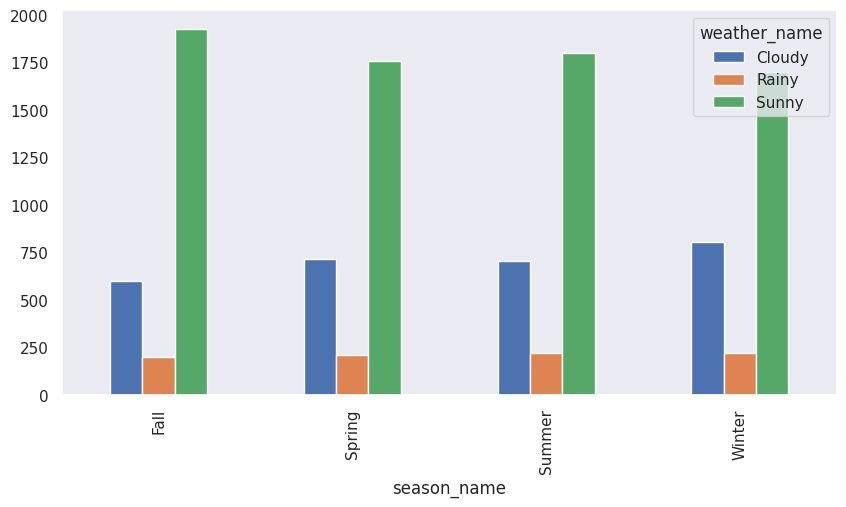

In [84]:
contingency.plot(kind = "bar",figsize = (10,5))
plt.show()

In [85]:
h0 = " Weather conditions are independent of the season"
h1 = " Weather conditions are dependent of the season"

alpha = 0.05

stats,p_val,dof,expected = chi2_contingency(contingency)
print("p_value :",p_val)
print("stats :",stats)

p_value : 2.826001450992924e-08
stats : 46.1014573107325


In [86]:
if p_val < alpha:
  print("Null hypothesis is rejected :", h1)
else:
  print("fail to reject null hypothesis:",h0)

Null hypothesis is rejected :  Weather conditions are dependent of the season


Observation: Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the weather conditions are dependent on the ongoing season.

Here are some insights and recommendations based on our analysis:

**1. Holidays vs. Regular Days**: Our analysis indicates that there is a significant difference in the number of bike rides between regular days and holidays, with regular days having a higher or similar average number of rides compared to holidays.

     **Recommendation:** Marketing and operational strategies could focus on promoting bike usage during regular days.
**2. Seasonality:** The average number of bike rides is significantly different across different seasons.

     **Recommendation:** Yulu could tailor their inventory and marketing efforts based on seasonal demand. For instance, increasing the number of bikes available during peak seasons (Summer and Fall based on the descriptive statistics) and adjusting promotions accordingly.
**3.Weather Conditions:** The average number of bike rides is significantly different across different weather conditions.

     **Recommendation:** Yulu should consider the impact of weather on demand. They might need to adjust bike availability or offer incentives during less favorable weather conditions (like Rainy weather based on descriptive statistics). The single data point for weather category 4 should be investigated further if possible, but based on the current data, it's hard to draw conclusions.


## Insights
1.  Weekdays vs. Weekends: The analysis suggests that the average number of bike rides during weekdays is greater than or equal to those on weekends.
Recommendation: This insight supports focusing on weekday usage for maximizing rentals.
2.  Weather and Season Dependency: Our analysis shows that weather conditions are dependent on the season.

** Recommendation:** This interdependency should be considered when forecasting demand and planning operations. For example, anticipating certain weather patterns during specific seasons can help in better resource allocation.
Overall, the demand for shared electric cycles is influenced by various factors including holidays, seasons, and weather conditions. By understanding these relationships, Yulu can optimize their operations, marketing, and resource allocation strategies to better meet customer demand and potentially increase ridership.

Insights from hypothesis testing -
1. The no. of bikes rented on weekdays is comparatively higher than on weekends.
2. The no. of bikes rented on regular days is comparatively higher than on holidays.
3. The demand of bicycles on rent differs under different weather conditions.
4. The demand of bicycles on rent is different during different seasons.
5. The weather conditions are surely dependent upon the ongoing season.

Generic recommendations -
1. The demand of bikes on rent are usually higher during Weekdays.
2. The demand of bikes on rent are usually higher during Regular days.
3. The chances of person renting a bike are usually higher during Season 3.
4. The chances of person renting a bike are usually higher during Weather condition 1.
We recommend the company to maintain the bike stocks accordingly.